## **Maximizing CNN Validation Performance - Political Meme Classification**

<br></br>
### **Introduction**

This project focuses on designing and optimizing a convolutional neural network (CNN) for the classification of political memes into conservative and liberal viewpoints, aiming to achieve the highest possible accuracy on a validation set. The process includes employing techniques like early stopping and model checkpointing to monitor performance, and making adjustments to the CNN architecture based on changes in accuracy related to hyperparameters such as filters and layers. The task emphasizes reproducibility through a pre-determined data split and involves the creation of separate data generators for training, validation, and testing. The project’s success will be ultimately evaluated on an independent test set, with learning curves and detailed analysis included in the final report.


<br></br>
### **Dataset Source**



For this project, the image dataset was sourced by exploring meme-focused pages on social platforms such as Reddit, Facebook, and Pinterest. A total of 1,000 images were collected, with an equal distribution between conservative and liberal political themes.

Special thanks to `Kate Arendes` for contributions to the collection process.

<br></br>
<h3><b> Loading Python Libraries </b></h3>

In [1]:
import PIL
import numpy as np
from PIL import Image
from keras import layers
from tensorflow import keras
from keras import regularizers
from google.colab import drive
import matplotlib.pyplot as plt
from keras.metrics import Precision
from keras.preprocessing.image import ImageDataGenerator

<br></br>
### **Load the data: The Political Memes Classification Dataset**


- `First, lets download the images from google drive:`

In [2]:
# Let's mount the drive to load the images
drive.mount('/content/drive')

Mounted at /content/drive


<br></br>
### **Dataset Generation - Image Data Generator**

In [3]:
# Let's set the base directory for loading the political meme images
base_directory = "/content/drive/My Drive/Political Meme Dataset/"

# Let's initialize the ImageDataGenerator with rescaling to normalize pixel values
my_generator = ImageDataGenerator(rescale=1./255)

# Let's set up the training data generator
# This loads images of size 150x150, in batches of 4, with binary class labels
train_generator = my_generator.flow_from_directory(
    f"{base_directory}/training/",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

# Let's set up the validation data generator
# Loads images of the same size and batch size as the training generator
valid_generator = my_generator.flow_from_directory(
    f"{base_directory}/validation/",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

# Let's set up the test data generator
# Uses the same parameters for consistency across training, validation, and testing
test_generator = my_generator.flow_from_directory(
    f"{base_directory}/test/",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


<br></br>
### **Data Visualization**

In [4]:
# Let's load a single image using PIL library.
image = Image.open(f"{base_directory}/training/train_liberal/0f76446d7d65a9e6508a226ae33e8a51--felder-donald-oconnor.jpg")

# Let's get some details about the image.
print("Image Mode   -->", image.mode)
print("Image Format --> ", image.format)
print("Image Size   -->", image.size)

Image Mode   --> RGB
Image Format -->  JPEG
Image Size   --> (118, 108)


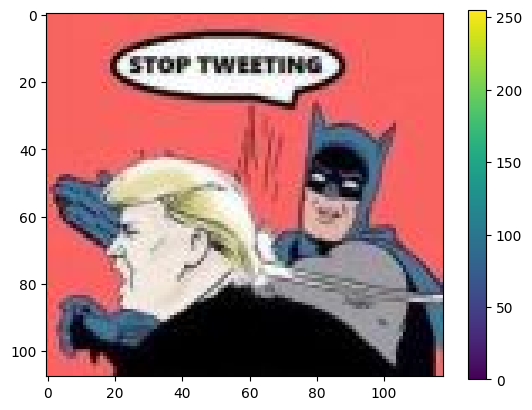

In [5]:
# Let's display the colored image
plt.imshow(np.asarray(image))
plt.colorbar()

<br></br>

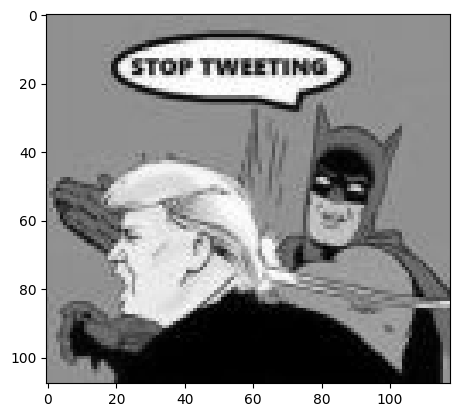

In [6]:
# Let's convert the input image to grayscale
gs_image = image.convert(mode='L')

# Let's display the grayscale image using matplotlib
plt.imshow(np.asarray(gs_image), cmap='gray')

(200, 200)


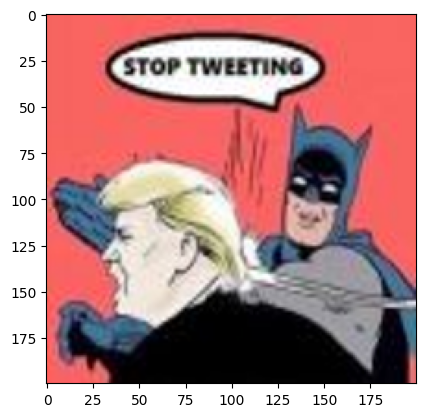

In [7]:
# Let's resize the image to 200x200 pixels
img_resized = image.resize((200,200))

# Let's print the size of the resized image to verify the new dimensions
print(img_resized.size)

# Let's display the resized image using matplotlib
plt.imshow(np.asarray(img_resized))

<br></br>
#### **Train Images - Data Visualization**

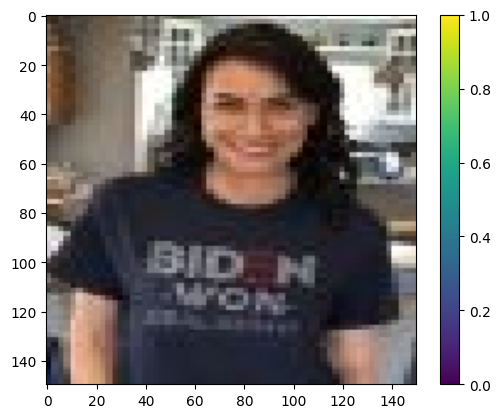

1.0


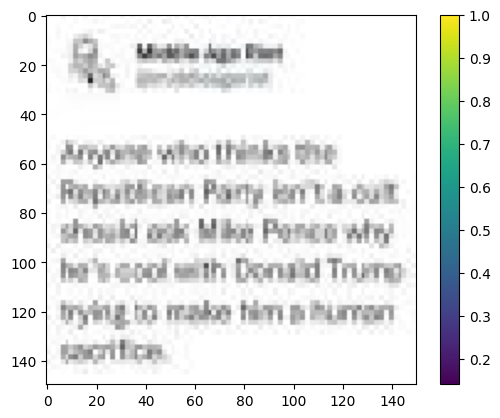

1.0


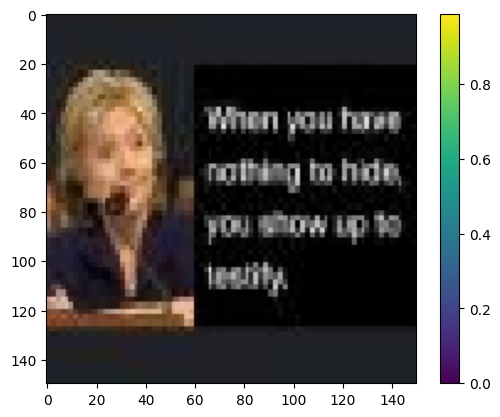

1.0


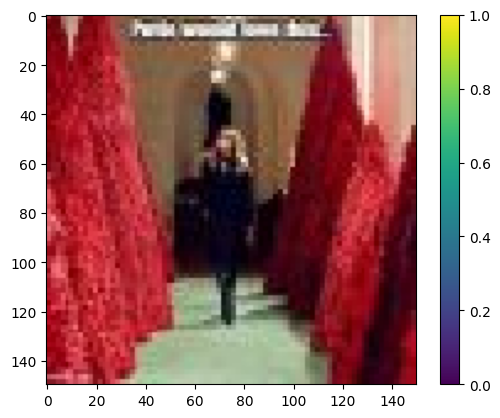

1.0


In [8]:
# Let's loop through batches of images from the train generator
for my_batch in train_generator:
    images = my_batch[0]
    labels = my_batch[1]

    # Let's iterate over each image and its corresponding label in the batch
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()

        # Let's print the label associated with the image
        print(labels[i])
    break

<br></br>
#### **Validation Images - Data Visualization**

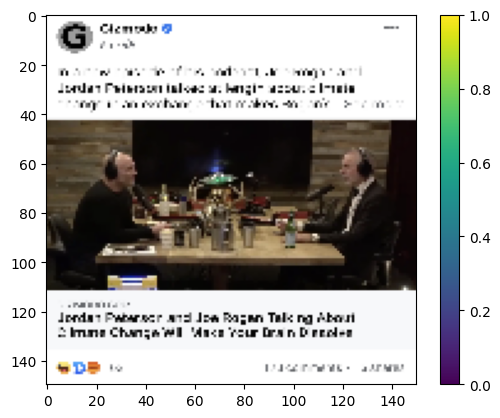

0.0


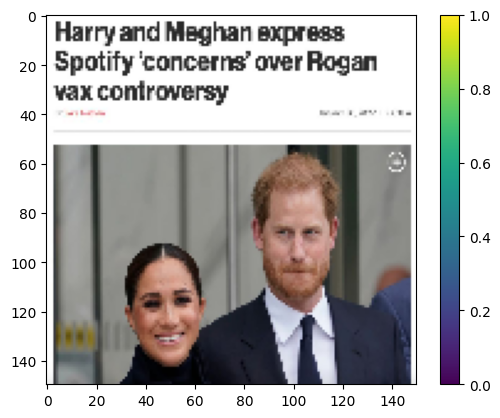

0.0


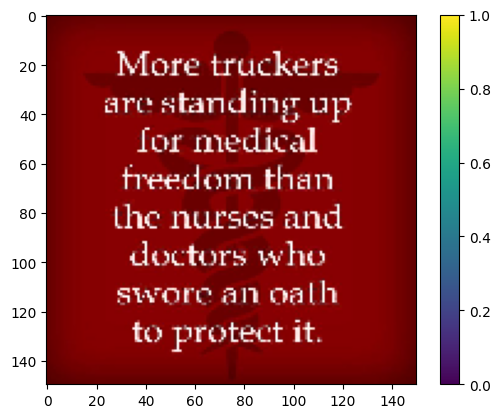

0.0


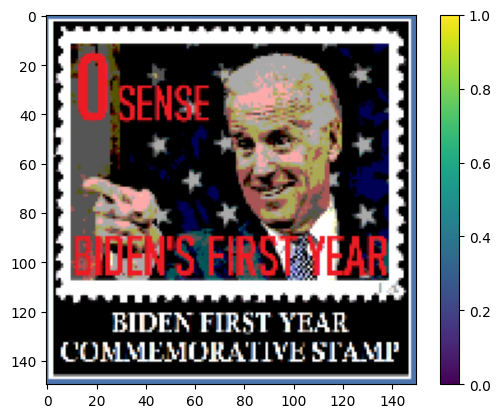

0.0


In [9]:
# Let's loop through batches of images from the validation generator
for my_batch in valid_generator:
    images = my_batch[0]
    labels = my_batch[1]

    # Let's iterate over each image and its corresponding label in the batch
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()

        # Let's print the label associated with the image
        print(labels[i])
    break

<br></br>
#### **Test Images - Data Visualization**

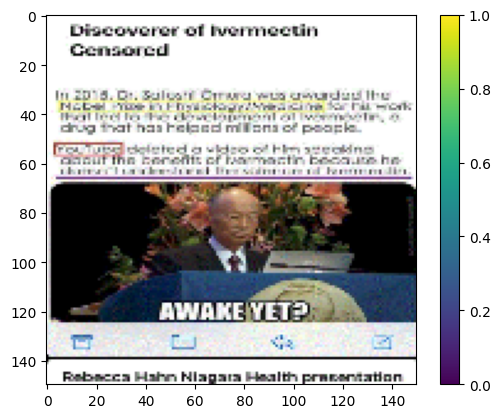

0.0


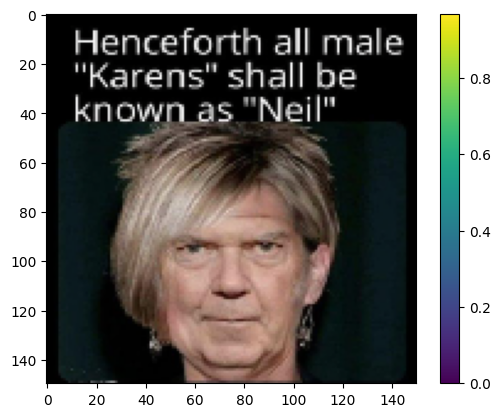

0.0


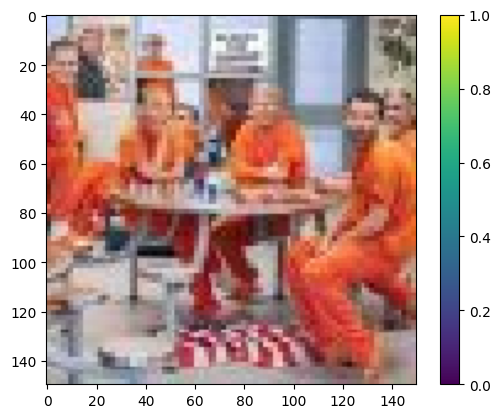

1.0


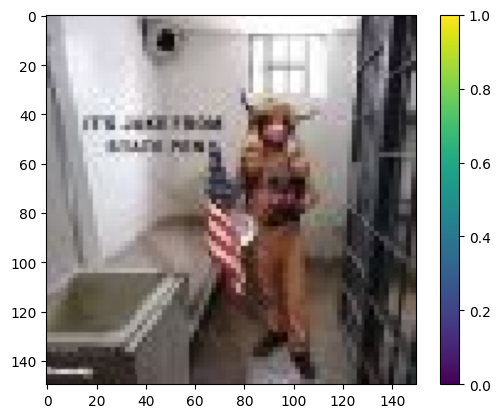

1.0


In [10]:
# Let's loop through batches of images from the test generator
for my_batch in test_generator:
    images = my_batch[0]
    labels = my_batch[1]

    # Let's iterate over each image and its corresponding label in the batch
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()

        # Let's print the label associated with the image
        print(labels[i])
    break

<br></br>
### **Model Building**

In [11]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856 

In [12]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

In [13]:
# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

In [14]:
# Let's train and validate model on the training and validation data

history = model.fit(train_generator, validation_data = valid_generator, epochs = 10, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/10
150/150 [==============================] - 199s 1s/step - loss: 0.6202 - accuracy: 0.6500 - precision: 0.7320 - val_loss: 0.4253 - val_accuracy: 0.8500 - val_precision: 0.7734
Epoch 2/10
150/150 [==============================] - 5s 32ms/step - loss: 0.5194 - accuracy: 0.7867 - precision: 0.7350 - val_loss: 0.2858 - val_accuracy: 0.9350 - val_precision: 0.8991
Epoch 3/10
150/150 [==============================] - 4s 26ms/step - loss: 0.4284 - accuracy: 0.8450 - precision: 0.8090 - val_loss: 0.3491 - val_accuracy: 0.8600 - val_precision: 0.7812
Epoch 4/10
150/150 [==============================] - 4s 25ms/step - loss: 0.3633 - accuracy: 0.8717 - precision: 0.8431 - val_loss: 0.3017 - val_accuracy: 0.8750 - val_precision: 0.8000
Epoch 5/10
150/150 [==============================] - 5s 34ms/step - loss: 0.3063 - accuracy: 0.8950 - precision: 0.8762 - val_loss: 0.1791 - val_accuracy: 0.9350 - val_precision: 0.8991
Epoch 6/10
150/150 [==============================] - 5s 33ms/ste

<br></br>
### **Model Evaluation(Precison, Recall, F1-score)**

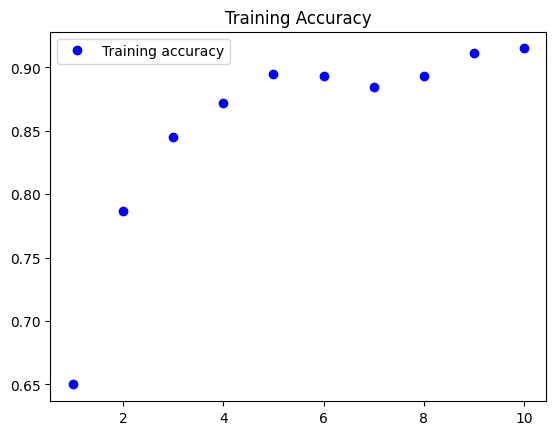

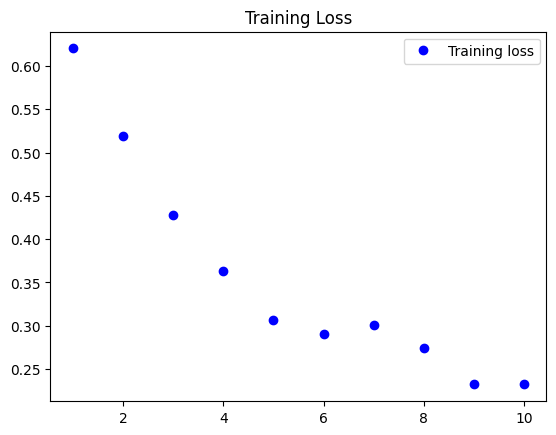

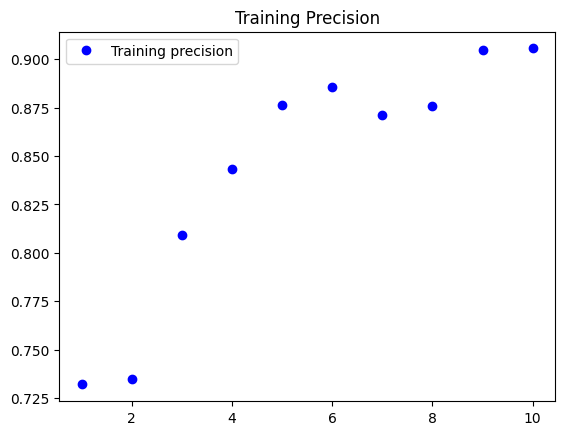

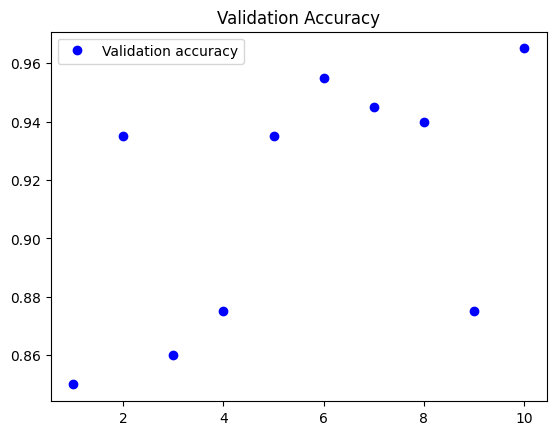

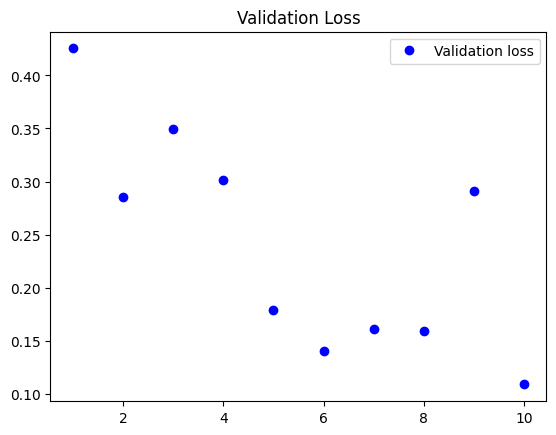

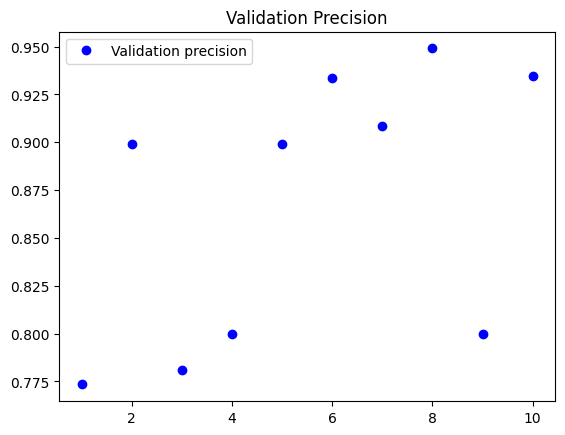

In [15]:
train_accuracy = history.history["accuracy"]
train_loss = history.history["loss"]
train_precision = history.history["precision"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
val_precision = history.history["val_precision"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [16]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 70s 1s/step - loss: 0.1488 - accuracy: 0.9450 - precision: 0.9083


[0.14878995716571808, 0.9449999928474426, 0.9082568883895874]

<br></br>

**The initial model architecture resulted in a training accuracy of 0.9150 and a validation accuracy of 0.9650 after being trained for 10 epochs. The next steps include increasing the number of epochs to 50 to observe how the training and validation accuracies change across different epochs. This extended training period will help determine if the model is benefiting from more training time or if it begins to overfit the training data. Observing the trend in validation accuracy will also indicate whether the model generalizes well to unseen data. Additional measures, such as implementing early stopping or adjusting the learning rate, may be considered based on the outcomes observed at different epochs.**

<br></br>
### **Let's Increase the Epochs**

In [17]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_increase_epochs = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_increase_epochs.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="base_model_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_increase_epochs = model_increase_epochs.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 34ms/step - loss: 0.6681 - accuracy: 0.6400 - precision_1: 0.7283 - val_loss: 0.5018 - val_accuracy: 0.7050 - val_precision_1: 0.9767
Epoch 2/30
150/150 [==============================] - 5s 32ms/step - loss: 0.5604 - accuracy: 0.7417 - precision_1: 0.6986 - val_loss: 0.3345 - val_accuracy: 0.9050 - val_precision_1: 0.8462
Epoch 3/30
150/150 [==============================] - 5s 32ms/step - loss: 0.4619 - accuracy: 0.8300 - precision_1: 0.7878 - val_loss: 0.2333 - val_accuracy: 0.9350 - val_precision_1: 0.9485
Epoch 4/30
150/150 [==============================] - 5s 33ms/step - loss: 0.3606 - accuracy: 0.8667 - precision_1: 0.8481 - val_loss: 0.1744 - val_accuracy: 0.9450 - val_precision_1: 0.9083
Epoch 5/30
150/150 [==============================] - 4s 26ms/step - loss: 0.3189 - accuracy: 0.8867 - precision_1: 0.8648 - val_loss: 0.3221 - val_accuracy: 0.8650 - val_precision_1: 0.7874
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - 30 epochs**

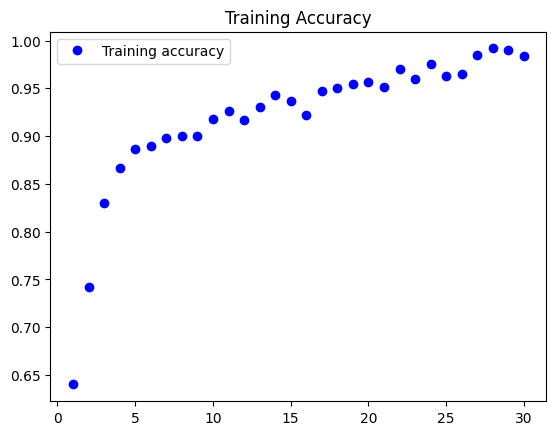

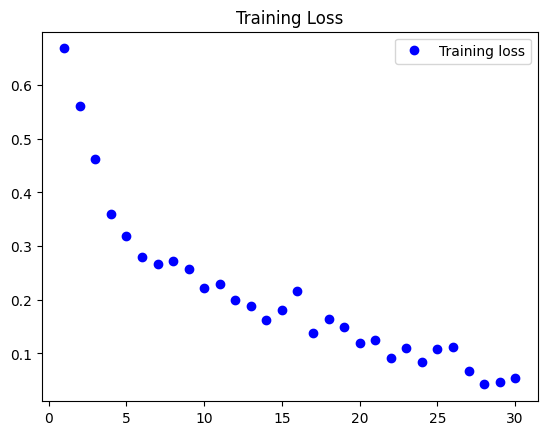

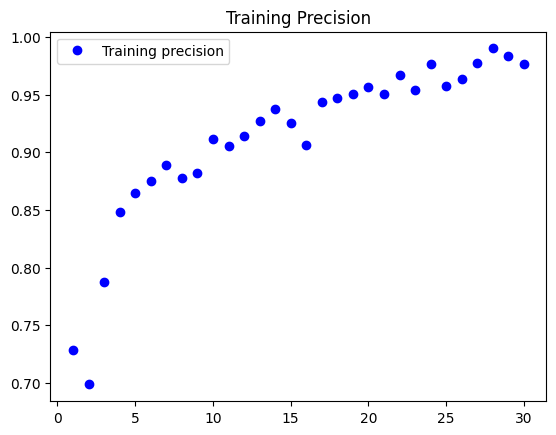

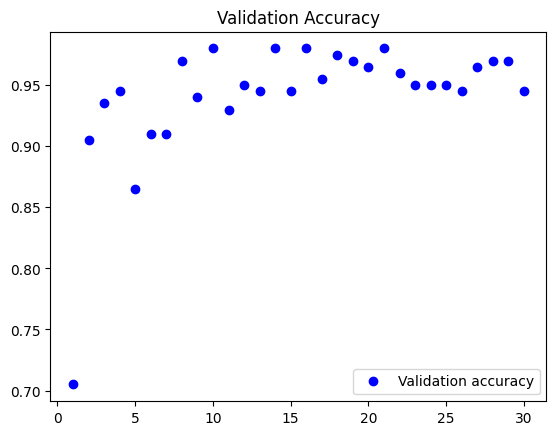

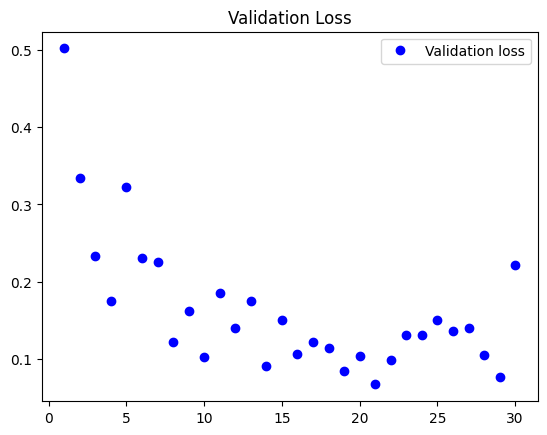

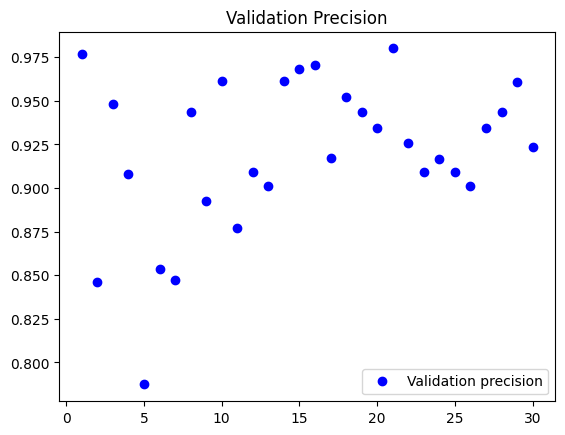

In [19]:
train_accuracy = history_increase_epochs.history["accuracy"]
train_loss = history_increase_epochs.history["loss"]
train_precision = history_increase_epochs.history["precision_1"]
val_accuracy = history_increase_epochs.history["val_accuracy"]
val_loss = history_increase_epochs.history["val_loss"]
val_precision = history_increase_epochs.history["val_precision_1"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [20]:
# Let's loads the best-performing model and evaluate on the test data

best_model = keras.models.load_model("base_model_checkpoint_filepath")
best_model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.1348 - accuracy: 0.9650 - precision_1: 0.9429


[0.13483797013759613, 0.9649999737739563, 0.9428571462631226]

<br></br>

**Increasing the number of epochs from 10 to 30 resulted in an increase in training accuracy from 0.93 to 0.99. Similarly, the validation accuracy increased from 0.9650 to 0.98. As expected, the time required for training increased significantly from 3 minutes to 5 minutes due to the higher number of epochs. This indicates that the model benefited from additional training, as evidenced by the improvements in both training and validation accuracies.**

<br></br>
### **Decrease the number of layers**

In [21]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_decrease_layers = keras.Model(inputs=inputs, outputs=outputs)

In [22]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_decrease_layers.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="decrease_layers_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_decrease_layers = model_decrease_layers.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 33ms/step - loss: 0.6517 - accuracy: 0.6250 - precision_2: 0.6728 - val_loss: 0.7375 - val_accuracy: 0.5100 - val_precision_2: 0.5051
Epoch 2/30
150/150 [==============================] - 5s 32ms/step - loss: 0.5341 - accuracy: 0.7783 - precision_2: 0.7434 - val_loss: 0.4411 - val_accuracy: 0.7950 - val_precision_2: 0.7092
Epoch 3/30
150/150 [==============================] - 5s 33ms/step - loss: 0.5041 - accuracy: 0.8083 - precision_2: 0.7577 - val_loss: 0.3115 - val_accuracy: 0.8850 - val_precision_2: 0.8130
Epoch 4/30
150/150 [==============================] - 5s 33ms/step - loss: 0.4163 - accuracy: 0.8483 - precision_2: 0.8083 - val_loss: 0.2468 - val_accuracy: 0.9200 - val_precision_2: 0.8750
Epoch 5/30
150/150 [==============================] - 5s 34ms/step - loss: 0.3555 - accuracy: 0.8583 - precision_2: 0.8308 - val_loss: 0.2346 - val_accuracy: 0.9400 - val_precision_2: 0.9151
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Decrease convolution layers**

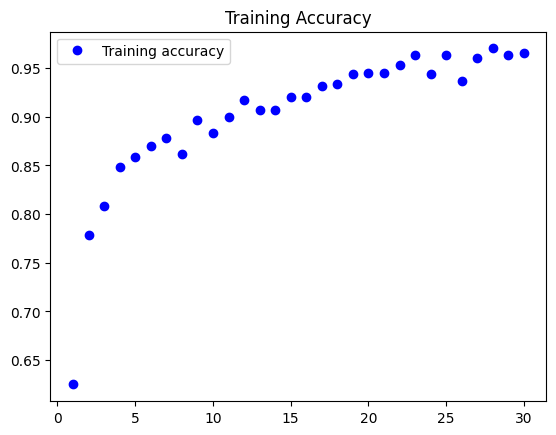

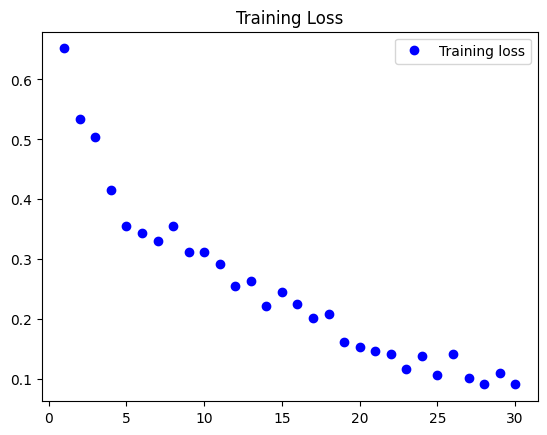

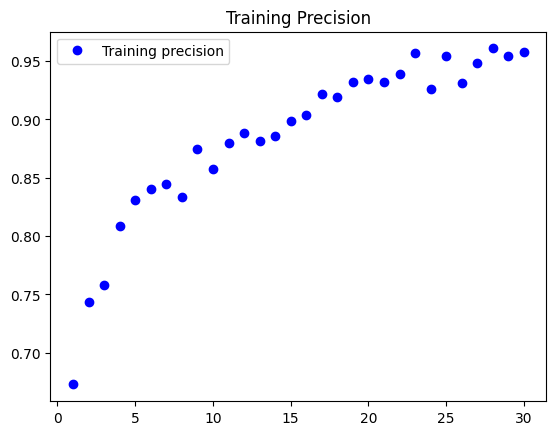

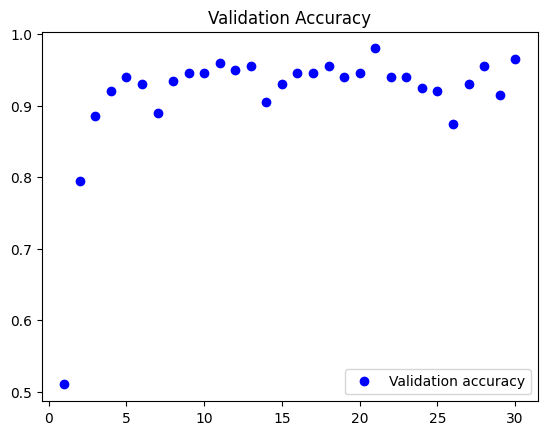

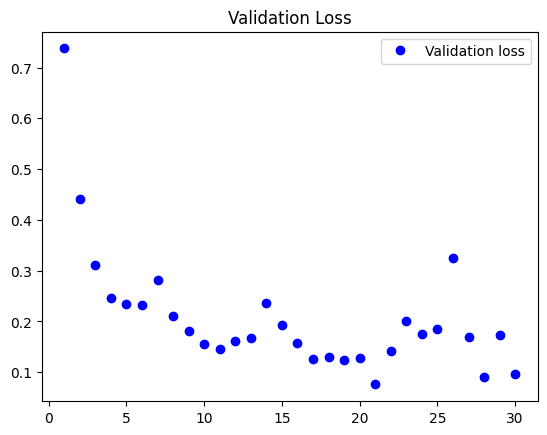

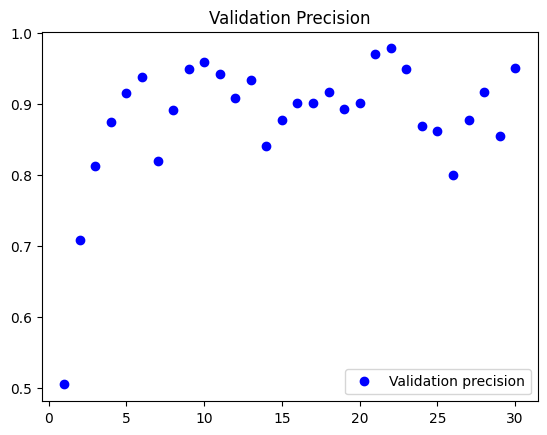

In [23]:
train_accuracy = history_decrease_layers.history["accuracy"]
train_loss = history_decrease_layers.history["loss"]
train_precision = history_decrease_layers.history["precision_2"]
val_accuracy = history_decrease_layers.history["val_accuracy"]
val_loss = history_decrease_layers.history["val_loss"]
val_precision = history_decrease_layers.history["val_precision_2"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [24]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("decrease_layers_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.1183 - accuracy: 0.9600 - precision_2: 0.9340


[0.11833204329013824, 0.9599999785423279, 0.9339622855186462]

<br></br>

**Surprisingly, decreasing one convolution and pooling layers by resulted in a training accuracy of 0.9650 and a validation accuracy of 0.9650. The time it took to complete training and validation for 30 epochs was almost 3 minutes. The test performance is similar to the configuration with more layers; the accuracy with fewer layers is 0.9600, while the accuracy with more layers is 0.9650.**

<br></br>
### **Increase the number of convolutional filters**

In [28]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_increased_filters = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_increased_filters.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="increase_filters_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_increased_filters = model_increased_filters.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 35ms/step - loss: 0.6864 - accuracy: 0.5667 - precision_5: 0.5758 - val_loss: 0.5555 - val_accuracy: 0.5300 - val_precision_5: 1.0000
Epoch 2/30
150/150 [==============================] - 5s 34ms/step - loss: 0.5739 - accuracy: 0.7783 - precision_5: 0.7434 - val_loss: 0.3989 - val_accuracy: 0.9200 - val_precision_5: 0.8750
Epoch 3/30
150/150 [==============================] - 4s 25ms/step - loss: 0.4320 - accuracy: 0.8250 - precision_5: 0.7893 - val_loss: 0.4026 - val_accuracy: 0.8250 - val_precision_5: 0.7407
Epoch 4/30
150/150 [==============================] - 5s 32ms/step - loss: 0.3670 - accuracy: 0.8533 - precision_5: 0.8272 - val_loss: 0.2222 - val_accuracy: 0.9400 - val_precision_5: 0.9074
Epoch 5/30
150/150 [==============================] - 5s 33ms/step - loss: 0.3517 - accuracy: 0.8600 - precision_5: 0.8418 - val_loss: 0.1955 - val_accuracy: 0.9450 - val_precision_5: 0.9238
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Decrease convolution filters**

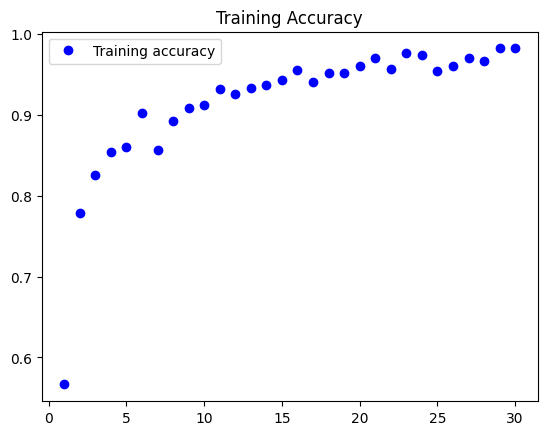

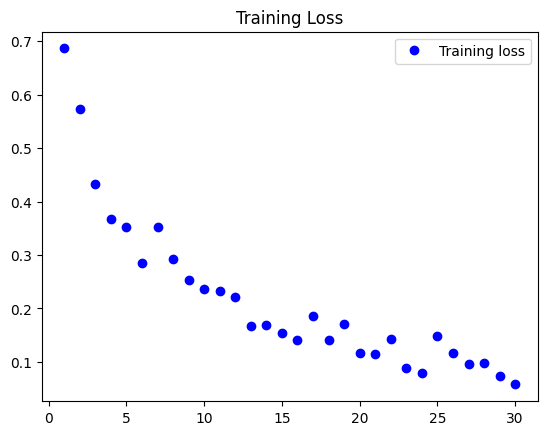

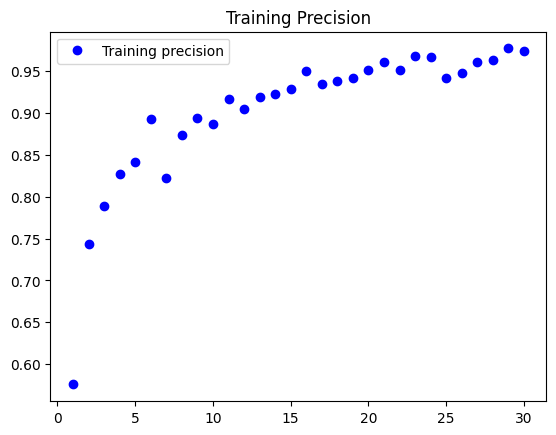

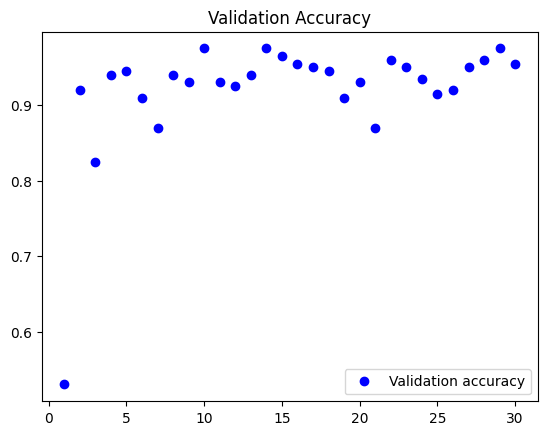

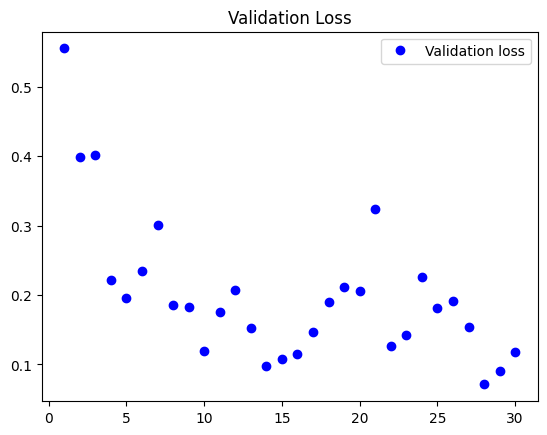

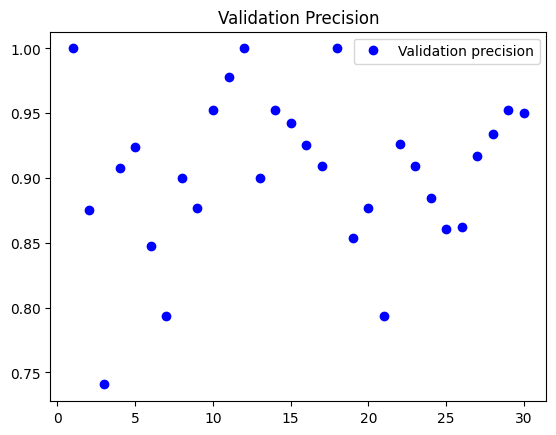

In [30]:
train_accuracy = history_increased_filters.history["accuracy"]
train_loss = history_increased_filters.history["loss"]
train_precision = history_increased_filters.history["precision_5"]
val_accuracy = history_increased_filters.history["val_accuracy"]
val_loss = history_increased_filters.history["val_loss"]
val_precision = history_increased_filters.history["val_precision_5"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [31]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("increase_filters_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.2045 - accuracy: 0.9400 - precision_5: 0.9000


[0.20448975265026093, 0.9399999976158142, 0.8999999761581421]

<br></br>

**Surprisingly, increasing the number of convolution filters from 128 to 256 in two convolution layers resulted in a training accuracy of 0.98 and a validation accuracy of 0.9550. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance is same to the configuration with more filters; the accuracy with fewer filters is 0.94, while the accuracy with base configuration is 0.9650.**

<br></br>
### **Decrease the image size**

In [32]:
# Define the input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_decreased_image_size = keras.Model(inputs=inputs, outputs=outputs)

In [33]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_decreased_image_size.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="decrease_image_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_decreased_image_size = model_decreased_image_size.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 34ms/step - loss: 0.6990 - accuracy: 0.5267 - precision_6: 0.5229 - val_loss: 0.6786 - val_accuracy: 0.6350 - val_precision_6: 0.9655
Epoch 2/30
150/150 [==============================] - 5s 33ms/step - loss: 0.6365 - accuracy: 0.6950 - precision_6: 0.6746 - val_loss: 0.4814 - val_accuracy: 0.8950 - val_precision_6: 0.8264
Epoch 3/30
150/150 [==============================] - 5s 33ms/step - loss: 0.5423 - accuracy: 0.7833 - precision_6: 0.7273 - val_loss: 0.3751 - val_accuracy: 0.8900 - val_precision_6: 0.8197
Epoch 4/30
150/150 [==============================] - 5s 33ms/step - loss: 0.4209 - accuracy: 0.8333 - precision_6: 0.7959 - val_loss: 0.1950 - val_accuracy: 0.9450 - val_precision_6: 0.9238
Epoch 5/30
150/150 [==============================] - 4s 26ms/step - loss: 0.3331 - accuracy: 0.8650 - precision_6: 0.8349 - val_loss: 0.2097 - val_accuracy: 0.9400 - val_precision_6: 0.9583
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Decreased Image Size**

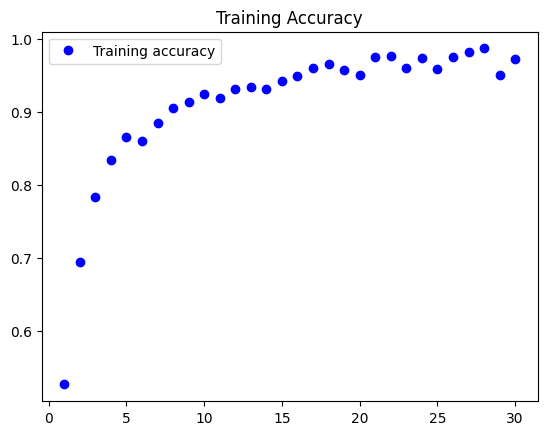

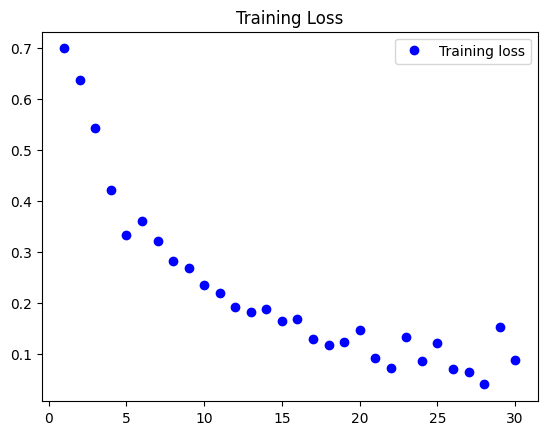

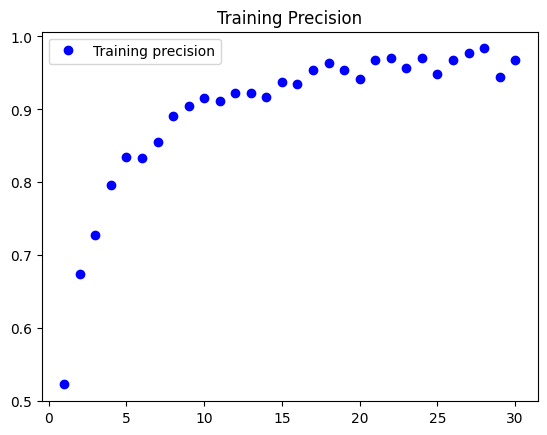

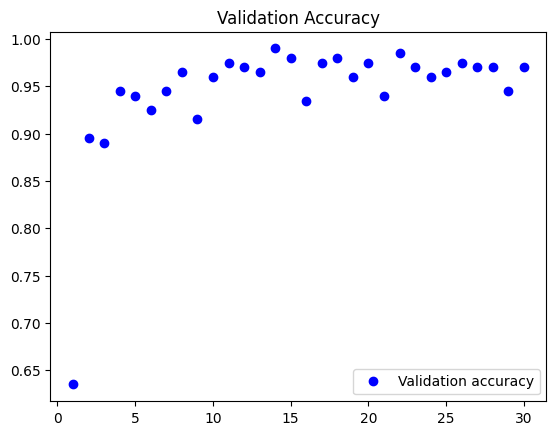

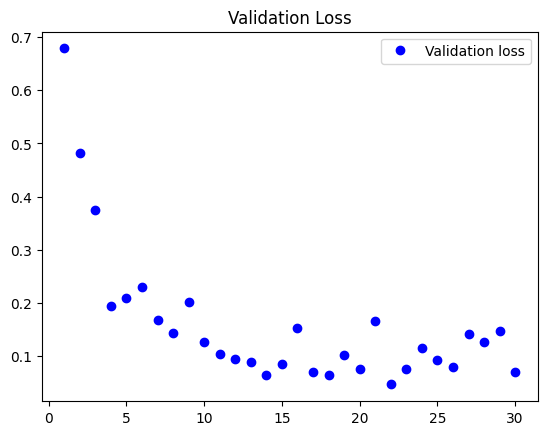

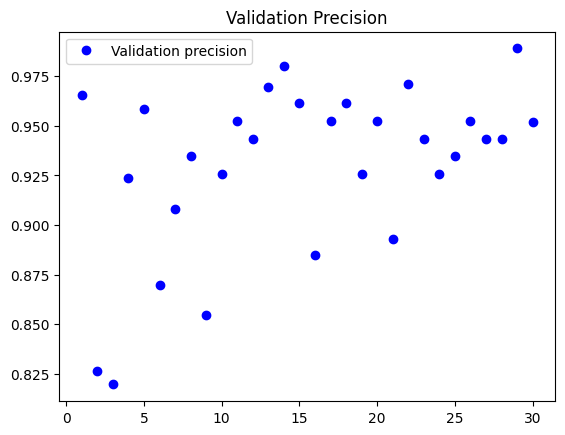

In [34]:
train_accuracy = history_decreased_image_size.history["accuracy"]
train_loss = history_decreased_image_size.history["loss"]
train_precision = history_decreased_image_size.history["precision_6"]
val_accuracy = history_decreased_image_size.history["val_accuracy"]
val_loss = history_decreased_image_size.history["val_loss"]
val_precision = history_decreased_image_size.history["val_precision_6"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [35]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("decrease_image_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 17ms/step - loss: 0.1472 - accuracy: 0.9400 - precision_6: 0.9074


[0.14721837639808655, 0.9399999976158142, 0.9074074029922485]

<br></br>

**Decreasing the size of input images by almost 40% resulted in a training accuracy of 0.9717 and a validation accuracy of 0.97. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance is identical to the configuration with larger input sizes; the accuracy with the smaller image size is 0.94, while the accuracy with the larger image size is 0.9650.**

<br></br>

#### The base configuration model outperformed all others in the experiments. Let's load the best model and continue with the data augmentation experiments.

In [36]:
# Let's load the best performing model

best_model = keras.models.load_model("base_model_checkpoint_filepath")

<br></br>
### **Rotation Augmentation**

In [37]:
# Rotation Augmentation
data_augmentation = keras.Sequential(
    [layers.RandomRotation(0.2)]  # 20 degrees
)

In [47]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_rotation_augmentation = keras.Model(inputs=inputs, outputs=outputs)

In [48]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_rotation_augmentation.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="rotation_augmentation_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_rotation_augmentation = model_rotation_augmentation.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 35ms/step - loss: 0.6799 - accuracy: 0.5700 - precision_10: 0.5714 - val_loss: 0.4949 - val_accuracy: 0.7950 - val_precision_10: 0.9538
Epoch 2/30
150/150 [==============================] - 5s 36ms/step - loss: 0.5688 - accuracy: 0.7833 - precision_10: 0.7560 - val_loss: 0.3203 - val_accuracy: 0.9050 - val_precision_10: 0.8403
Epoch 3/30
150/150 [==============================] - 5s 33ms/step - loss: 0.4012 - accuracy: 0.8533 - precision_10: 0.8232 - val_loss: 0.1926 - val_accuracy: 0.9300 - val_precision_10: 0.8772
Epoch 4/30
150/150 [==============================] - 4s 26ms/step - loss: 0.3607 - accuracy: 0.8817 - precision_10: 0.8523 - val_loss: 0.2017 - val_accuracy: 0.9550 - val_precision_10: 0.9505
Epoch 5/30
150/150 [==============================] - 4s 26ms/step - loss: 0.3452 - accuracy: 0.8667 - precision_10: 0.8395 - val_loss: 0.2345 - val_accuracy: 0.9200 - val_precision_10: 0.8621
Epoch 6/30
150/150 [===============

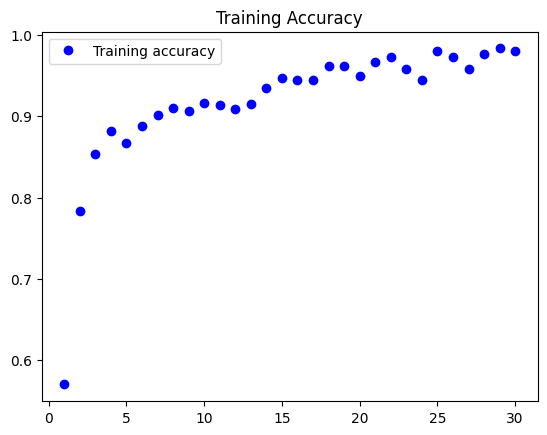

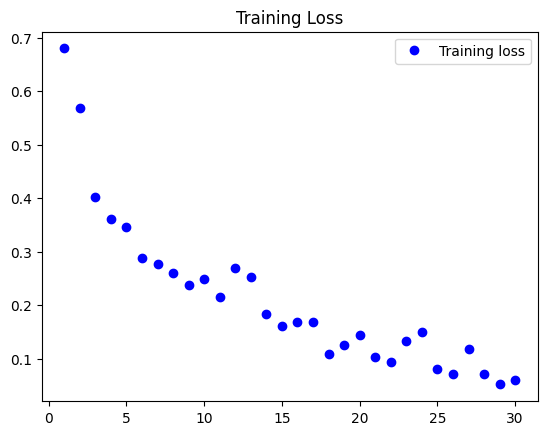

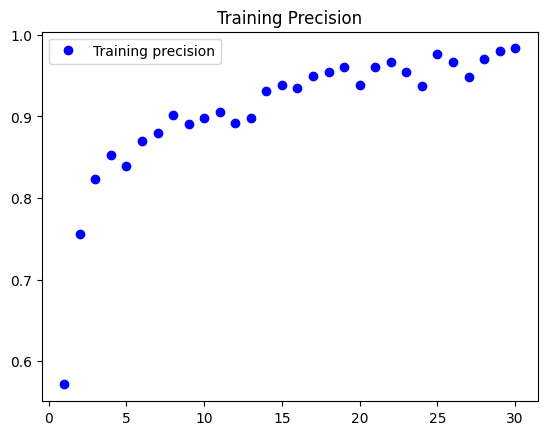

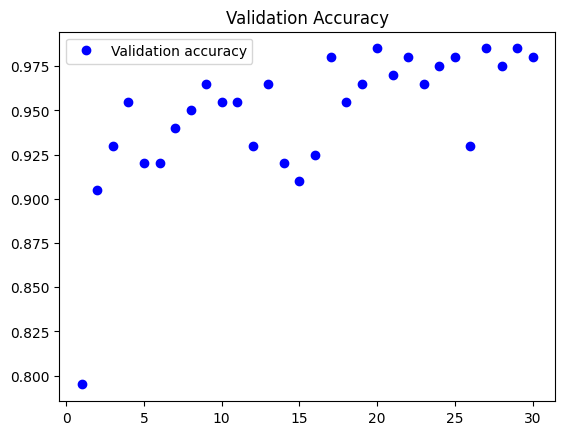

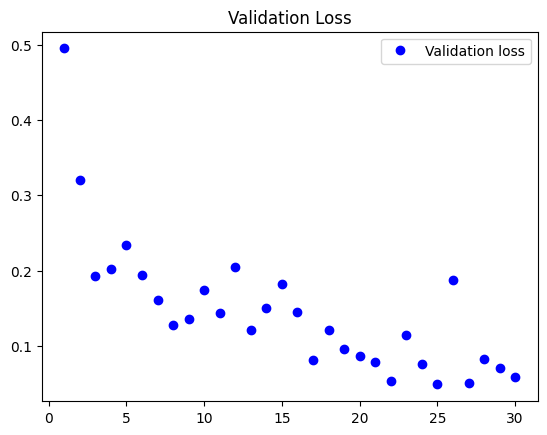

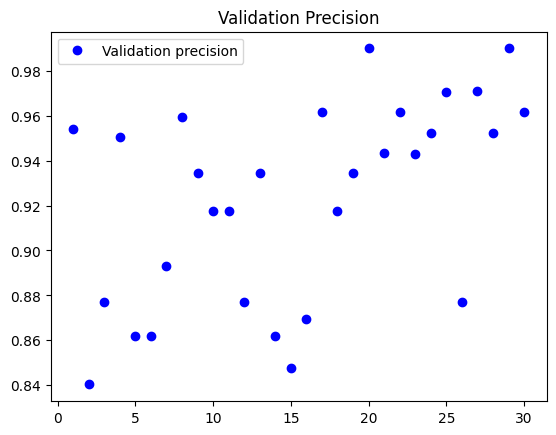

In [50]:
train_accuracy = history_rotation_augmentation.history["accuracy"]
train_loss = history_rotation_augmentation.history["loss"]
train_precision = history_rotation_augmentation.history["precision_10"]
val_accuracy = history_rotation_augmentation.history["val_accuracy"]
val_loss = history_rotation_augmentation.history["val_loss"]
val_precision = history_rotation_augmentation.history["val_precision_10"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [51]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("rotation_augmentation_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.0988 - accuracy: 0.9800 - precision_10: 0.9615


[0.09880392998456955, 0.9800000190734863, 0.9615384340286255]

<br></br>

**Applying the rotation augmentation resulted in a training accuracy of 0.98 and a validation accuracy of 0.98. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance improved compared to the base configuration; the accuracy with rotation augmentation is 0.98, while the accuracy with the base configuration is 0.9650.**

<br></br>
### **Width Shift Augmentation**

In [52]:
data_augmentation = keras.Sequential(
    [layers.RandomTranslation(width_factor=0.2, height_factor=0.0)]  # 20% width shift
)

In [53]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_width_shift_augmentation = keras.Model(inputs=inputs, outputs=outputs)

In [54]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_width_shift_augmentation.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="width_shift_augmentation_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_width_shift_augmentation = model_width_shift_augmentation.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 35ms/step - loss: 0.6653 - accuracy: 0.6333 - precision_11: 0.6869 - val_loss: 0.5129 - val_accuracy: 0.8000 - val_precision_11: 0.7143
Epoch 2/30
150/150 [==============================] - 5s 33ms/step - loss: 0.5834 - accuracy: 0.7433 - precision_11: 0.6984 - val_loss: 0.2870 - val_accuracy: 0.9150 - val_precision_11: 0.8739
Epoch 3/30
150/150 [==============================] - 6s 37ms/step - loss: 0.4163 - accuracy: 0.8433 - precision_11: 0.8140 - val_loss: 0.2449 - val_accuracy: 0.9400 - val_precision_11: 0.9074
Epoch 4/30
150/150 [==============================] - 4s 26ms/step - loss: 0.3795 - accuracy: 0.8600 - precision_11: 0.8253 - val_loss: 0.3664 - val_accuracy: 0.8500 - val_precision_11: 0.7692
Epoch 5/30
150/150 [==============================] - 5s 33ms/step - loss: 0.3394 - accuracy: 0.8717 - precision_11: 0.8474 - val_loss: 0.1726 - val_accuracy: 0.9500 - val_precision_11: 0.9091
Epoch 6/30
150/150 [===============

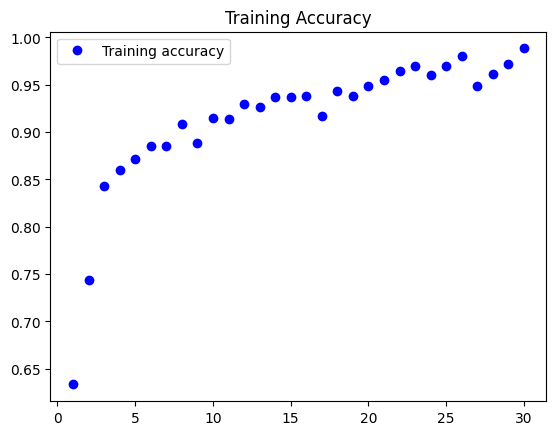

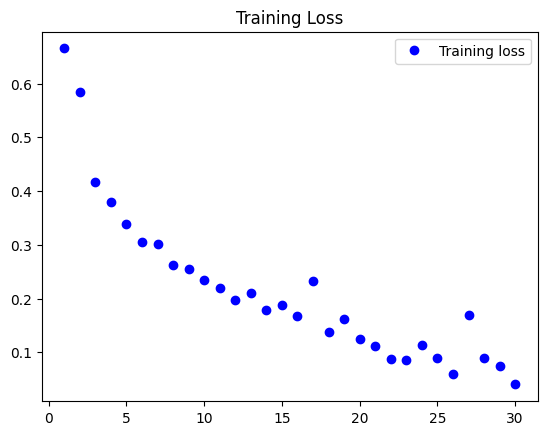

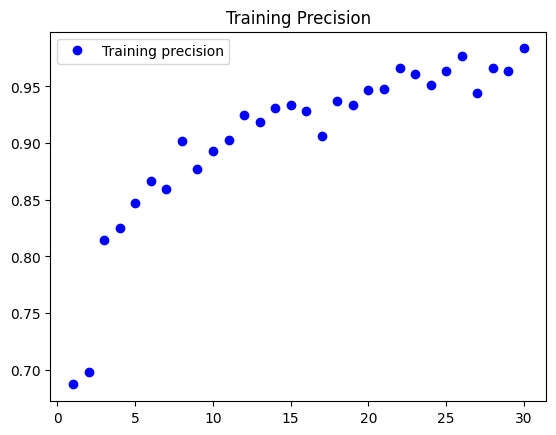

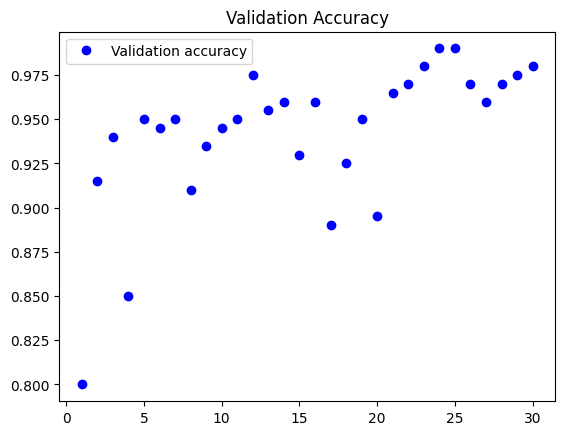

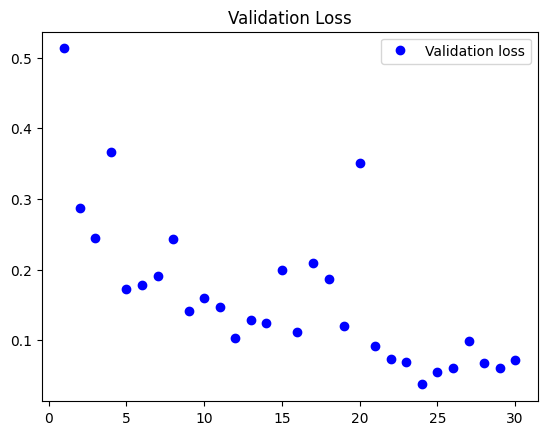

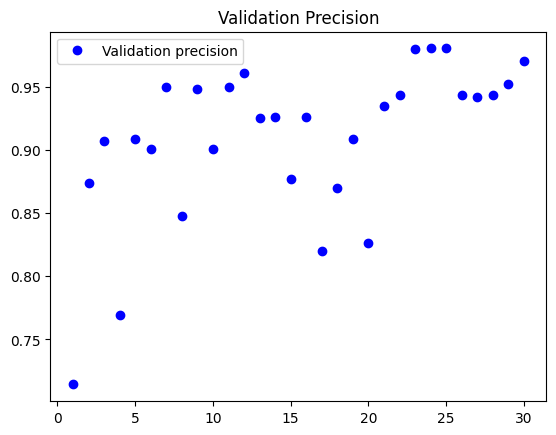

In [55]:
train_accuracy = history_width_shift_augmentation.history["accuracy"]
train_loss = history_width_shift_augmentation.history["loss"]
train_precision = history_width_shift_augmentation.history["precision_11"]
val_accuracy = history_width_shift_augmentation.history["val_accuracy"]
val_loss = history_width_shift_augmentation.history["val_loss"]
val_precision = history_width_shift_augmentation.history["val_precision_11"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [56]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("width_shift_augmentation_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 17ms/step - loss: 0.1022 - accuracy: 0.9750 - precision_11: 0.9612


[0.10224905610084534, 0.9750000238418579, 0.9611650705337524]

<br></br>

**Applying the width shift augmentation resulted in a training accuracy of 0.9883 and a validation accuracy of 0.98. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance improved compared to the base configuration; the accuracy with width shift augmentation is 0.9750, while the accuracy with the base configuration is 0.9650.**

<br></br>
### **Brightness Augmentation**

In [57]:
data_augmentation = keras.Sequential(
    [layers.RandomBrightness(0.5)]  # Range [0.5, 1.5]
)

In [61]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
brightness_augmentation = keras.Model(inputs=inputs, outputs=outputs)

In [62]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
brightness_augmentation.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="brightness_augmentation_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_brightness_augmentation = brightness_augmentation.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 34ms/step - loss: 0.6568 - accuracy: 0.5850 - precision_13: 0.6783 - val_loss: 0.5226 - val_accuracy: 0.8600 - val_precision_13: 0.7857
Epoch 2/30
150/150 [==============================] - 5s 35ms/step - loss: 0.4526 - accuracy: 0.8083 - precision_13: 0.7713 - val_loss: 0.2636 - val_accuracy: 0.9350 - val_precision_13: 0.9394
Epoch 3/30
150/150 [==============================] - 4s 27ms/step - loss: 0.3716 - accuracy: 0.8833 - precision_13: 0.8616 - val_loss: 0.6083 - val_accuracy: 0.7100 - val_precision_13: 0.6329
Epoch 4/30
150/150 [==============================] - 5s 34ms/step - loss: 0.3571 - accuracy: 0.8650 - precision_13: 0.8454 - val_loss: 0.1704 - val_accuracy: 0.9400 - val_precision_13: 0.8929
Epoch 5/30
150/150 [==============================] - 5s 33ms/step - loss: 0.3074 - accuracy: 0.8933 - precision_13: 0.8687 - val_loss: 0.1463 - val_accuracy: 0.9450 - val_precision_13: 0.9083
Epoch 6/30
150/150 [===============

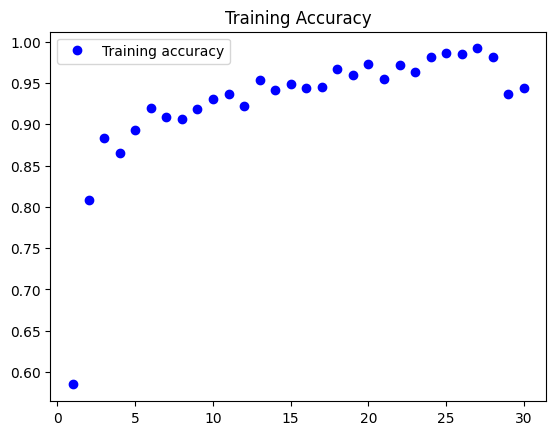

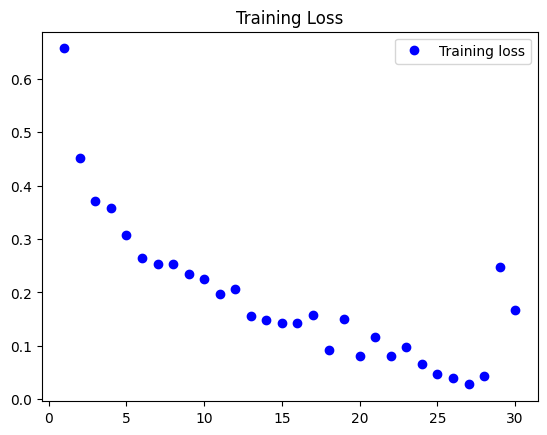

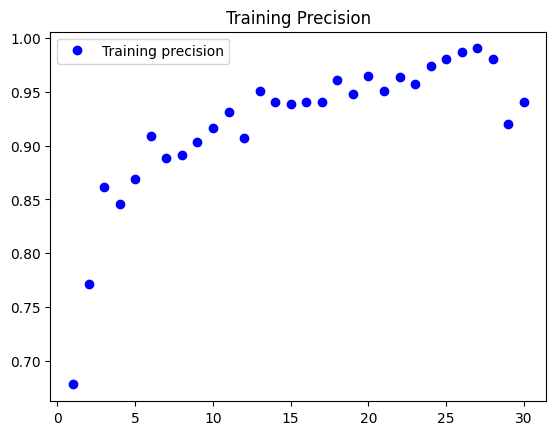

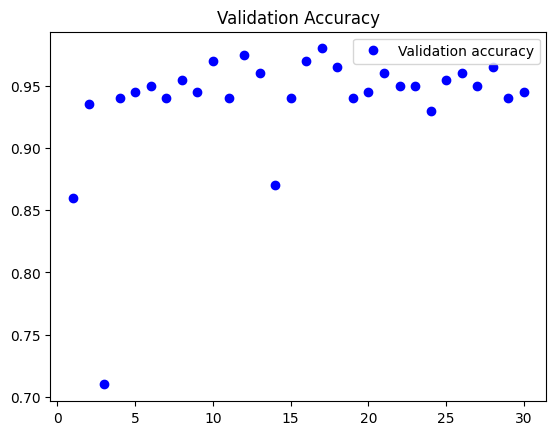

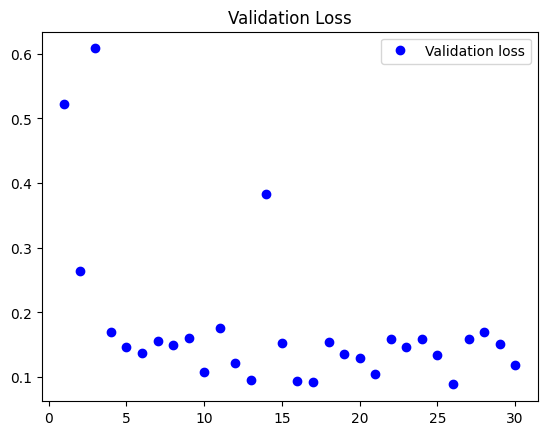

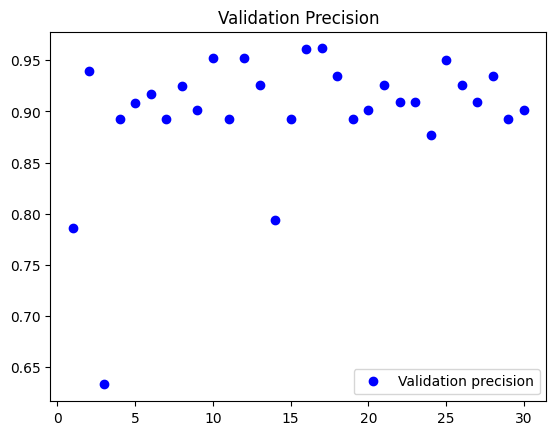

In [64]:
train_accuracy = history_brightness_augmentation.history["accuracy"]
train_loss = history_brightness_augmentation.history["loss"]
train_precision = history_brightness_augmentation.history["precision_13"]
val_accuracy = history_brightness_augmentation.history["val_accuracy"]
val_loss = history_brightness_augmentation.history["val_loss"]
val_precision = history_brightness_augmentation.history["val_precision_13"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [63]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("brightness_augmentation_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.1735 - accuracy: 0.9550 - precision_13: 0.9174


[0.17353056371212006, 0.9549999833106995, 0.9174311757087708]

<br></br>

**Applying the brightness augmentation resulted in a training accuracy of 0.98 and a validation accuracy of 0.9650. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance is almost similar to the base configuration; the accuracy with brightness augmentation is 0.9550, while the accuracy with the base configuration is 0.9650.**

<br></br>
### **Horizontal flip**

In [65]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal")]
)

In [66]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
horizontal_flip_augmentation = keras.Model(inputs=inputs, outputs=outputs)

In [67]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
horizontal_flip_augmentation.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="horizontal_flip_augmentation_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_flip_augmentation = horizontal_flip_augmentation.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 8s 35ms/step - loss: 0.6728 - accuracy: 0.5633 - precision_14: 0.5913 - val_loss: 0.6970 - val_accuracy: 0.5000 - val_precision_14: 0.5000
Epoch 2/30
150/150 [==============================] - 5s 33ms/step - loss: 0.5717 - accuracy: 0.7083 - precision_14: 0.6844 - val_loss: 0.3000 - val_accuracy: 0.8900 - val_precision_14: 0.9149
Epoch 3/30
150/150 [==============================] - 5s 34ms/step - loss: 0.5321 - accuracy: 0.7767 - precision_14: 0.7385 - val_loss: 0.2666 - val_accuracy: 0.8950 - val_precision_14: 0.9072
Epoch 4/30
150/150 [==============================] - 4s 26ms/step - loss: 0.4134 - accuracy: 0.8400 - precision_14: 0.8000 - val_loss: 0.3490 - val_accuracy: 0.8750 - val_precision_14: 0.8000
Epoch 5/30
150/150 [==============================] - 5s 33ms/step - loss: 0.3834 - accuracy: 0.8467 - precision_14: 0.8171 - val_loss: 0.1897 - val_accuracy: 0.9350 - val_precision_14: 0.9307
Epoch 6/30
150/150 [===============

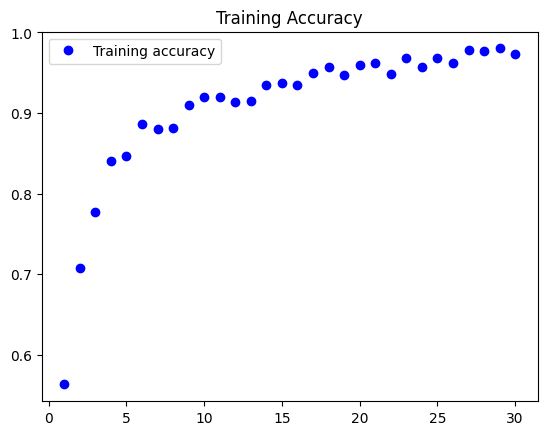

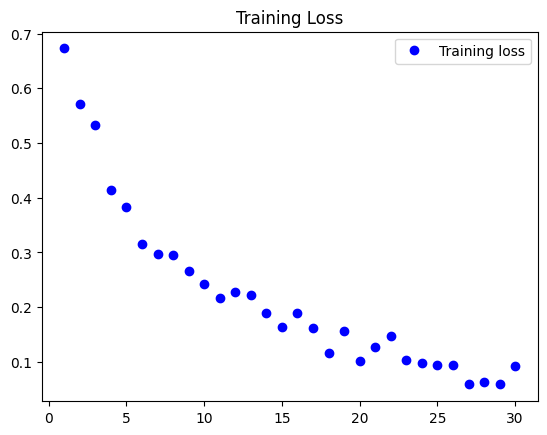

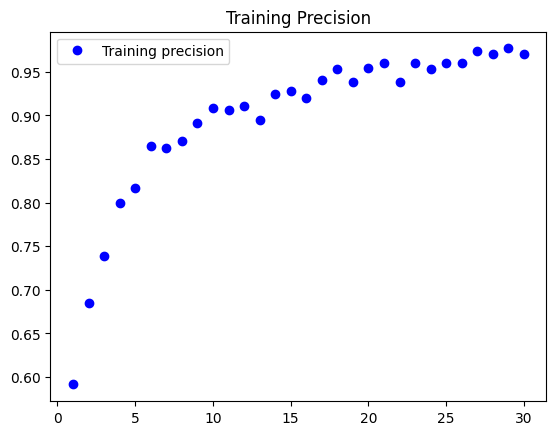

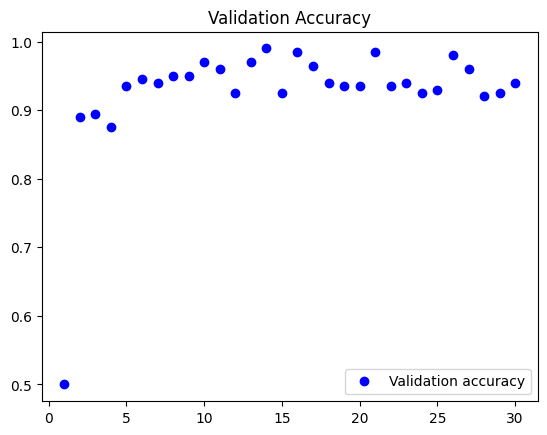

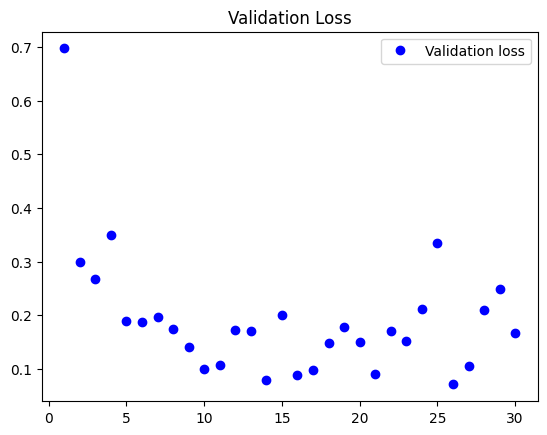

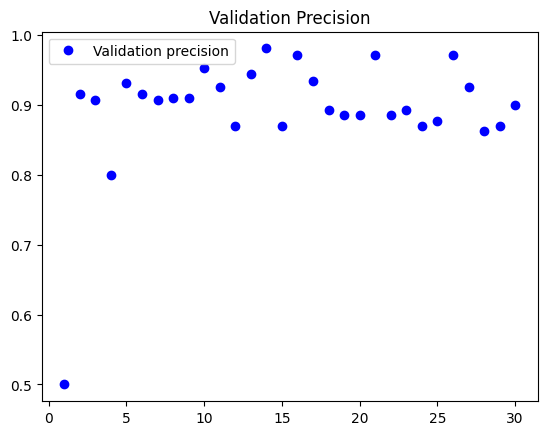

In [69]:
train_accuracy = history_flip_augmentation.history["accuracy"]
train_loss = history_flip_augmentation.history["loss"]
train_precision = history_flip_augmentation.history["precision_14"]
val_accuracy = history_flip_augmentation.history["val_accuracy"]
val_loss = history_flip_augmentation.history["val_loss"]
val_precision = history_flip_augmentation.history["val_precision_14"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [70]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("horizontal_flip_augmentation_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 17ms/step - loss: 0.1305 - accuracy: 0.9650 - precision_14: 0.9346


[0.13046668469905853, 0.9649999737739563, 0.9345794320106506]

<br></br>

**Applying the horizontal flip resulted in a training accuracy of 0.9736 and a validation accuracy of 0.96. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance is similar to the base configuration; the accuracy with horizontal flip is 0.9650, while the accuracy with the base configuration is 0.9650.**

<br></br>
### **Combined Augmentation**

In [71]:
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.2),  # 20 degrees
        layers.RandomTranslation(width_factor=0.2, height_factor=0.0),  # 20% shift
        layers.RandomBrightness(0.5),  # Brightness variation
        layers.RandomFlip("horizontal")  # Horizontal flip
    ]
)

In [72]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_combined_augmentation = keras.Model(inputs=inputs, outputs=outputs)

In [73]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_combined_augmentation.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="combined_augmentation_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_combined_augmentation = model_combined_augmentation.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 8s 38ms/step - loss: 0.6796 - accuracy: 0.5783 - precision_15: 0.5770 - val_loss: 0.6771 - val_accuracy: 0.6100 - val_precision_15: 0.5618
Epoch 2/30
150/150 [==============================] - 5s 33ms/step - loss: 0.5650 - accuracy: 0.7267 - precision_15: 0.7125 - val_loss: 0.2966 - val_accuracy: 0.8950 - val_precision_15: 0.8319
Epoch 3/30
150/150 [==============================] - 5s 33ms/step - loss: 0.3897 - accuracy: 0.8600 - precision_15: 0.8253 - val_loss: 0.2114 - val_accuracy: 0.9400 - val_precision_15: 0.9074
Epoch 4/30
150/150 [==============================] - 5s 33ms/step - loss: 0.4412 - accuracy: 0.8367 - precision_15: 0.7953 - val_loss: 0.2100 - val_accuracy: 0.9200 - val_precision_15: 0.8684
Epoch 5/30
150/150 [==============================] - 5s 33ms/step - loss: 0.3093 - accuracy: 0.8850 - precision_15: 0.8598 - val_loss: 0.1798 - val_accuracy: 0.9450 - val_precision_15: 0.9083
Epoch 6/30
150/150 [===============

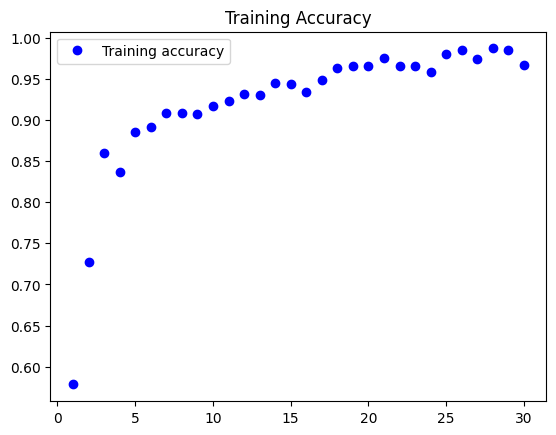

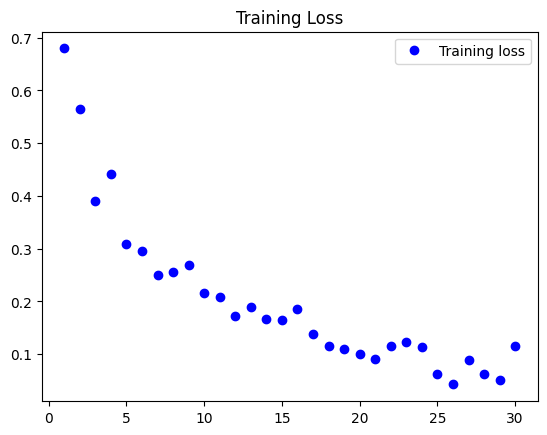

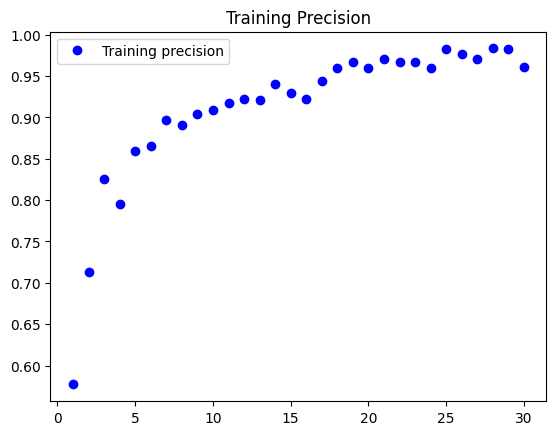

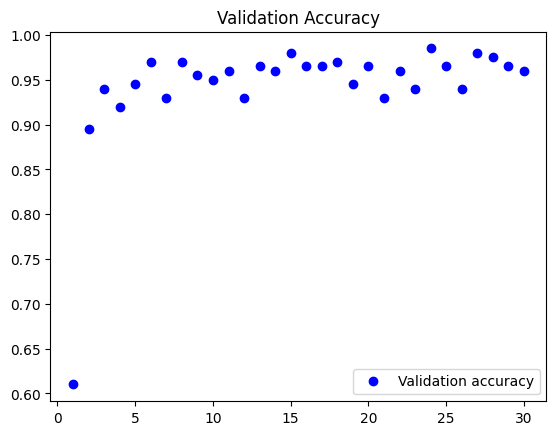

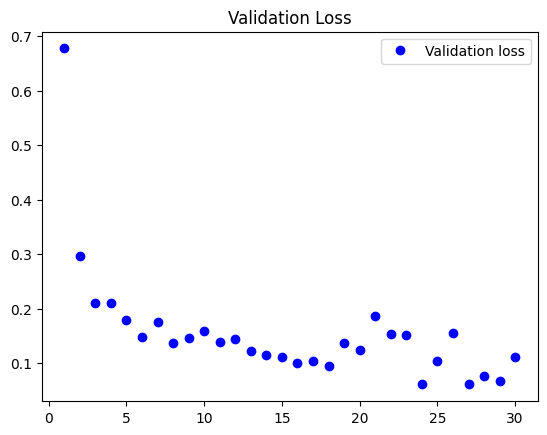

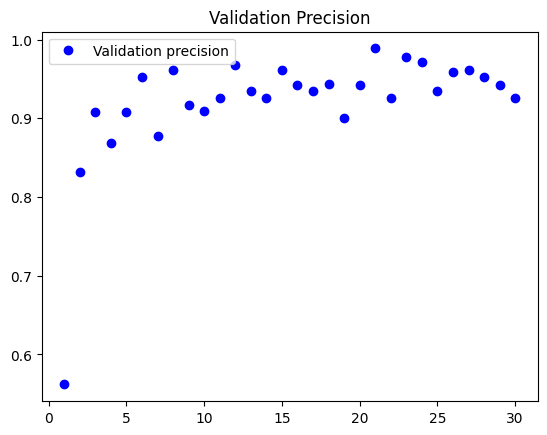

In [75]:
train_accuracy = history_combined_augmentation.history["accuracy"]
train_loss = history_combined_augmentation.history["loss"]
train_precision = history_combined_augmentation.history["precision_15"]
val_accuracy = history_combined_augmentation.history["val_accuracy"]
val_loss = history_combined_augmentation.history["val_loss"]
val_precision = history_combined_augmentation.history["val_precision_15"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [76]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("combined_augmentation_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 15ms/step - loss: 0.1426 - accuracy: 0.9600 - precision_15: 0.9259


[0.14260855317115784, 0.9599999785423279, 0.9259259104728699]


<br></br>
#### **Comparison of Data Augmentation Techniques on Model Performance**
<br></br>

| Augmentation Type                | Validation Accuracy | Test Accuracy |
|----------------------------------|---------------------|---------------|
| Rotation Augmentation (20 degrees) | 0.98                | 0.98          |
| Width Shift Augmentation (0.2)   | 0.98                | 0.975         |
| Brightness Augmentation (0.5)    | 0.965               | 0.955         |
| Horizontal Flip Augmentation     | 0.96                | 0.965         |
| Combined Augmentation            | 0.98                | 0.96          |
